In [1]:
import keras
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import glob

/Users/jackgan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def crop_image_from_gray(img,tol=7):
    """
    Crop out black borders
    https://www.kaggle.com/ratthachat/aptos-updated-preprocessing-ben-s-cropping
    """  
    
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        mask = gray_img>tol        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0):
            return img
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img


def circle_crop(img):   
    """
    Create circular crop around image centre    
    """    
    
    img = cv2.imread(img)
    img = crop_image_from_gray(img)    
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    
    return img 

def circle_crop_v2(img):
    """
    Create circular crop around image centre
    """
    img = cv2.imread(img)
    img = crop_image_from_gray(img)

    height, width, depth = img.shape
    largest_side = np.max((height, width))
    img = cv2.resize(img, (largest_side, largest_side))

    height, width, depth = img.shape

    x = int(width / 2)
    y = int(height / 2)
    r = np.amin((x, y))

    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x, y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)

    return img

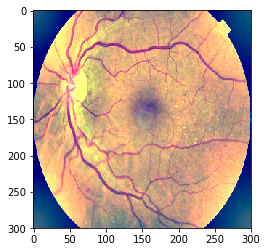

In [3]:
# image preprocessing 
data = pd.read_csv("train.csv")
data.set_index('id_code',inplace=True)


# load all the image names in train images file 
entries = os.listdir('train_images/')
img_size = 300

for entry in entries[:2]:
    
    #print(data.at[entry[0:12],'diagnosis'])
    try: 
        fig.add_subplot(5, 5, count, xticks=[], yticks=[])
        image = cv2.imread('train_images/%s' % entry)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = crop_image_from_gray(image)
        image = cv2.resize(image, (img_size, img_size))
        image = cv2.addWeighted(image,4, cv2.GaussianBlur(image,(0,0),img_size/10),-4 ,128)
        #ret, image = cv2.threshold(image, 160, 255, cv2.THRESH_BINARY)
        #image = cv2.applyColorMap(image, cv2.COLORMAP_JET)
        plt.imshow(image)
        #plt.imsave('color_images_train/%s' % entry,image,cmap='gray')
        
    except IOError:
        pass
    except KeyError:
        pass

